In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import joblib


In [40]:
# Load your dataset
# Assuming 'filtered.csv' contains your dataset
df = pd.read_csv('final dataset.csv')
df.drop(df.columns.difference(['Age','Gender','Polyuria (frequent urination)','Polydipsia(excessive thirst)','weakness','visual blurring','Result']), 1, inplace=True)
df


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Age,Gender,Polyuria (frequent urination),Polydipsia(excessive thirst),weakness,visual blurring,Result
0,40,1,0,1,1,0,1
1,58,1,0,0,1,1,1
2,41,1,1,0,1,0,1
3,45,1,0,0,1,0,1
4,60,1,1,1,1,1,1
...,...,...,...,...,...,...,...
515,39,0,1,1,0,0,1
516,48,0,1,1,1,0,1
517,58,0,1,1,1,1,1
518,32,0,0,0,1,1,0


In [41]:
df.shape

(520, 7)

In [42]:
df

,Age,Gender,Polyuria (frequent urination),Polydipsia(excessive thirst),weakness,visual blurring,Result
0,40,1,0,1,1,0,1
1,58,1,0,0,1,1,1
2,41,1,1,0,1,0,1
3,45,1,0,0,1,0,1
4,60,1,1,1,1,1,1
...,...,...,...,...,...,...,...
515,39,0,1,1,0,0,1
516,48,0,1,1,1,0,1
517,58,0,1,1,1,1,1
518,32,0,0,0,1,1,0


In [43]:
# Filter data based on age
df_filtered = df[(df['Age'] >= 55) & (df['Age'] <= 75)]
df_filtered

,Age,Gender,Polyuria (frequent urination),Polydipsia(excessive thirst),weakness,visual blurring,Result
1,58,1,0,0,1,1,1
4,60,1,1,1,1,1,1
5,55,1,1,1,1,1,1
6,57,1,1,1,1,0,1
7,66,1,1,1,1,1,1
...,...,...,...,...,...,...,...
508,58,1,0,0,1,0,0
510,67,1,0,0,1,0,0
511,66,1,0,0,1,1,0
513,62,0,1,1,1,1,1


In [44]:
df_filtered.shape

(157, 7)

In [45]:
# Check if there are any rows left after filtering
if df_filtered.empty:
    print("No data within the specified age range.")
else:
    # Separate features (X) and target variable (y)
    X = df_filtered.drop('Result', axis=1)
    y = df_filtered['Result']

In [46]:
# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
 # Initialize the RandomForestRegressor
reg = RandomForestRegressor(random_state=42)

In [48]:
# Train the model
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
# Make predictions on the test set
y_pred = reg.predict(X_test)

In [50]:
# Convert predictions to binary (1 or 0) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

In [51]:
# Get the number of correct predictions and total number of predictions
correct_predictions = accuracy_score(y_test, y_pred_binary, normalize=False)
total_predictions = len(y_test)

In [52]:
# Display results
print(f"Number of Correct Predictions: {correct_predictions}")
print(f"Total Number of Predictions: {total_predictions}")

Number of Correct Predictions: 31
Total Number of Predictions: 32


In [53]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [54]:
# Display results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.09280208333333334
Mean Squared Error: 0.027105331597222223


In [55]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

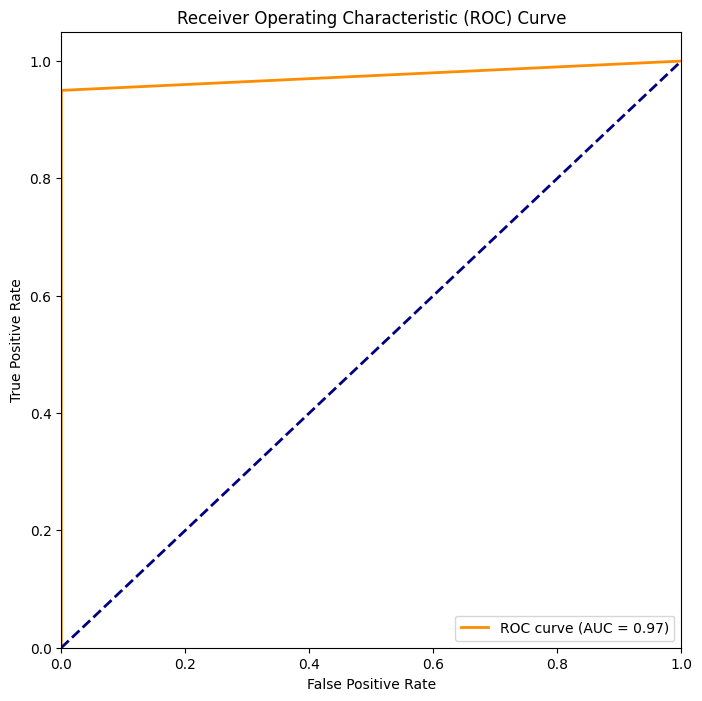

In [56]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [77]:
# Specify your new data point for prediction
new_data_point = np.array([[65, 1, 1, 0,0,0]])


In [78]:
# Make predictions on the new data point
new_data_point_pred = reg.predict(new_data_point)
new_data_point_pred_binary = (new_data_point_pred >= threshold).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [79]:
# print the accuracy ratio
accuracy_ratio = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy of the Model: {accuracy_ratio:.2f}")

Accuracy of the Model: 0.97


In [80]:
# Check if the patient is prone to diabetes based on a threshold
if y_pred[0] >= threshold:
    print("You are prone to diabetes.")
else:
    print("You are not prone to diabetes.")

You are prone to diabetes.


In [71]:
# joblib.dump(reg, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [82]:
import numpy as np

def predict_diabetes(i, j, k, l, threshold, reg):
    new_data_point = np.array([[65, 1, i, j, k, l]])
    new_data_point_pred = reg.predict(new_data_point)
    new_data_point_pred_binary = (new_data_point_pred >= threshold).astype(int)
    if new_data_point_pred_binary[0] == 1:
        print(f"For combination ({i},{j},{k},{l}): You are prone to diabetes.")
    else:
        print(f"For combination ({i},{j},{k},{l}): You are not prone to diabetes.")

def generate_combinations_and_predict(threshold, reg):
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    predict_diabetes(i, j, k, l, threshold, reg)

# Assuming you have defined threshold and reg somewhere before
threshold = 0.5  # Example threshold


generate_combinations_and_predict(threshold, reg)


For combination (0,0,0,0): You are prone to diabetes.
For combination (0,0,0,1): You are not prone to diabetes.
For combination (0,0,1,0): You are not prone to diabetes.
For combination (0,0,1,1): You are not prone to diabetes.
For combination (0,1,0,0): You are prone to diabetes.
For combination (0,1,0,1): You are prone to diabetes.
For combination (0,1,1,0): You are prone to diabetes.
For combination (0,1,1,1): You are prone to diabetes.
For combination (1,0,0,0): You are prone to diabetes.
For combination (1,0,0,1): You are not prone to diabetes.
For combination (1,0,1,0): You are prone to diabetes.
For combination (1,0,1,1): You are not prone to diabetes.
For combination (1,1,0,0): You are prone to diabetes.
For combination (1,1,0,1): You are prone to diabetes.
For combination (1,1,1,0): You are prone to diabetes.
For combination (1,1,1,1): You are prone to diabetes.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor 